In [1]:
import rebound
import numpy as np

In [2]:
sa = rebound.SimulationArchive("K47_1e3_Years.bin")

/rds/general/user/wc421/home/anaconda3/envs/test1/lib/python3.9/site-packages/rebound/simulationarchive.py:99: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)


In [3]:
Noutputs = len(sa)
x = np.zeros((5,Noutputs))
y = np.zeros((5,Noutputs))
z = np.zeros((5,Noutputs))
time = []

for i,sims in enumerate(sa): 
    time.append(sims.t/(2*np.pi))
    x[0][i] = sims.particles[0].x   # This stores the data which allows us to plot it later
    y[0][i] = sims.particles[0].y
    z[0][i] = sims.particles[0].z
    x[1][i] = sims.particles[1].x
    y[1][i] = sims.particles[1].y
    z[1][i] = sims.particles[1].z
    x[2][i] = sims.particles[2].x
    y[2][i] = sims.particles[2].y
    z[2][i] = sims.particles[2].z
    x[3][i] = sims.particles[3].x
    y[3][i] = sims.particles[3].y
    z[3][i] = sims.particles[3].z
    x[4][i] = sims.particles[4].x
    y[4][i] = sims.particles[4].y
    z[4][i] = sims.particles[4].z

/rds/general/user/wc421/home/anaconda3/envs/test1/lib/python3.9/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)


Text(0.5, 1.0, 'Kepler-47 Star System Track')

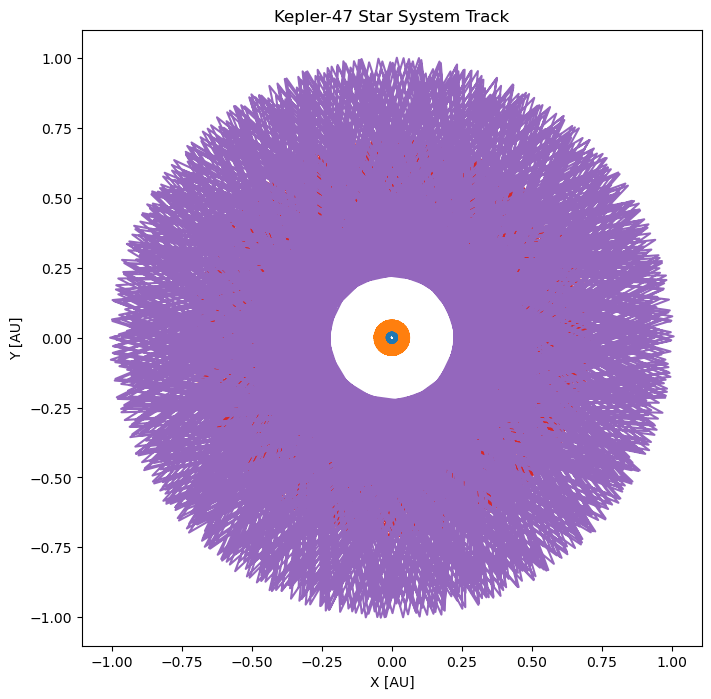

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111)
#ax.set_xlim([-6,6])
#ax.set_ylim([-6,6])
plt.plot(x[0], y[0]);
plt.plot(x[1], y[1]);
plt.plot(x[2], y[2]);
plt.plot(x[3], y[3]);
plt.plot(x[4], y[4]);
#plt.xlim(2400,2425)
#plt.ylim(-1470,-1460)
plt.xlabel("X [AU]")
plt.ylabel("Y [AU]")


#fit,cov = np.polyfit(x[2][3700:4459],y[2][3700:4459],1,cov=True)
#TFit = np.poly1d(fit)
#plt.plot(x[2],TFit(x[2]),color="red")

plt.title("Kepler-47 Star System Track")
#plt.savefig("IDK why this is happening Triple.png",dpi=300)

In [5]:
len(sa)

1001

In [6]:
sa.tmax/(2*np.pi)

1000000.0

/rds/general/user/wc421/home/anaconda3/envs/test1/lib/python3.9/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)


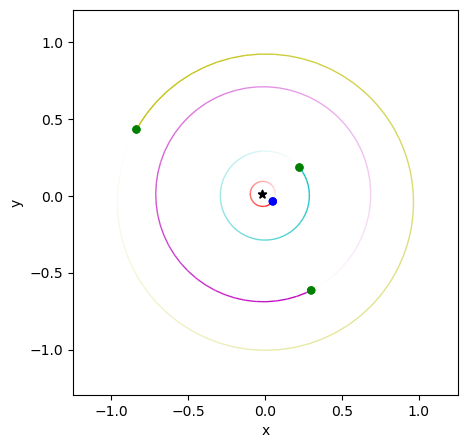

In [7]:
fig = rebound.OrbitPlot(sa[999],color = True)
fig.particles.set_color(["blue", "green","green","green"])

In [9]:
sa[1000].t/(2*np.pi)

1000000.0

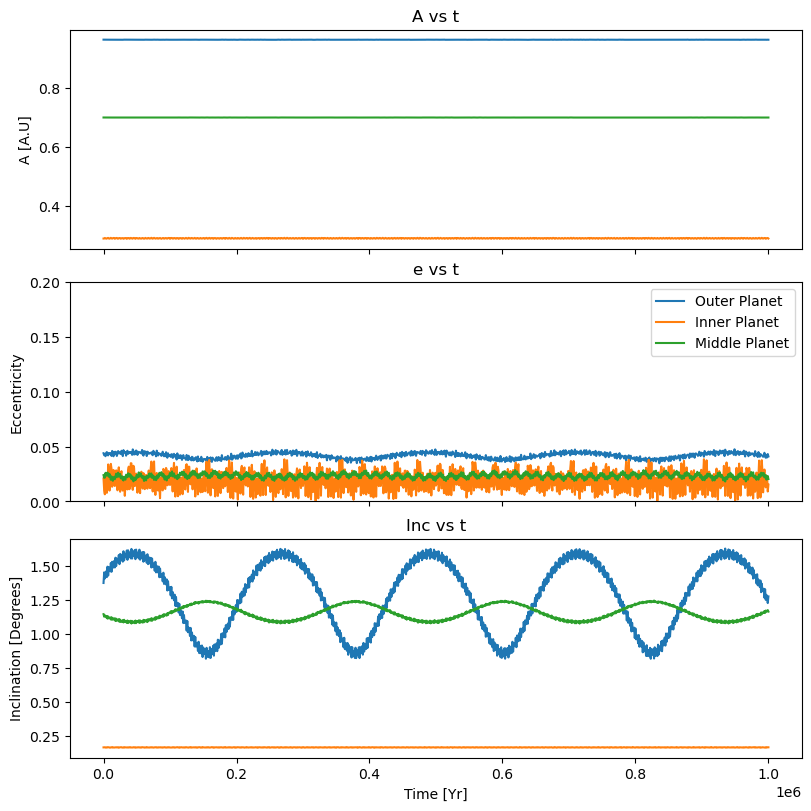

In [18]:
import matplotlib.pyplot as plt



time = []
e = []
a = []
inc = []

e2 = []
a2 = []
inc2 = []

e3 = []
a3 = []
inc3 = []

for i,sims in enumerate(sa): 
    time.append(sims.t/(2*np.pi))
    
    e.append(sims.particles[4].calculate_orbit().e)
    a.append(sims.particles[4].calculate_orbit().a)
    inc.append((sims.particles[4].calculate_orbit().inc)*180/np.pi)

    e2.append(sims.particles[2].calculate_orbit().e)
    a2.append(sims.particles[2].calculate_orbit().a)
    inc2.append((sims.particles[2].calculate_orbit().inc)*180/np.pi)
    
    e3.append(sims.particles[3].calculate_orbit().e)
    a3.append(sims.particles[3].calculate_orbit().a)
    inc3.append((sims.particles[3].calculate_orbit().inc)*180/np.pi)
    

f, (ax1, ax2, ax3) = plt.subplots(3, 1,figsize=(8,8), sharex=True,layout='constrained')

ax1.plot(time, a)
ax1.plot(time, a2)
ax1.plot(time, a3)


#ax1.set_ylim(0,4)
ax1.set_ylabel("A [A.U]")
ax1.set_title('A vs t')
ax1.ticklabel_format(useOffset=False)

ax2.set_title('e vs t')

ax2.plot(time, e,label = "Outer Planet")
ax2.plot(time, e2,label = "Inner Planet")
ax2.plot(time, e3,label = "Middle Planet")
ax2.legend()

ax2.set_ylabel("Eccentricity")
#ax2.set_ylim(0,1)

ax3.plot(time, inc)
ax3.plot(time, inc2)
ax3.plot(time, inc3)

#ax3.set_ylim(0,1)
ax3.set_ylabel("Inclination [Degrees]")
ax3.set_title('Inc vs t')

plt.xlabel("Time [Yr]")

#plt.gca().invert_xaxis()

plt.ticklabel_format(useOffset=False)


ax2.set_ylim(0,0.2)

plt.savefig("K47.png",dpi=300)

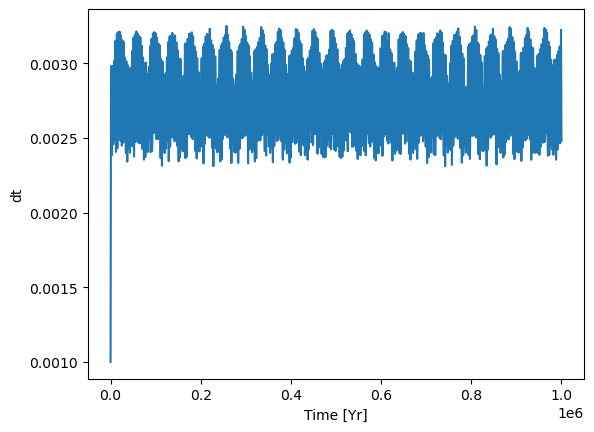

In [47]:
time = []
dt = []
for i,sims in enumerate(sa): 
    time.append(sims.t/(2*np.pi))
    dt.append(sims.dt)

plt.plot(time,dt)
plt.ylabel("dt")
plt.xlabel("Time [Yr]")
plt.ticklabel_format(useOffset=False)
#plt.ylim(0,1)

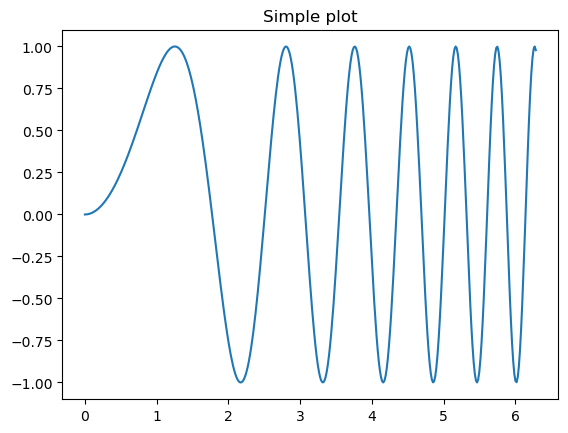

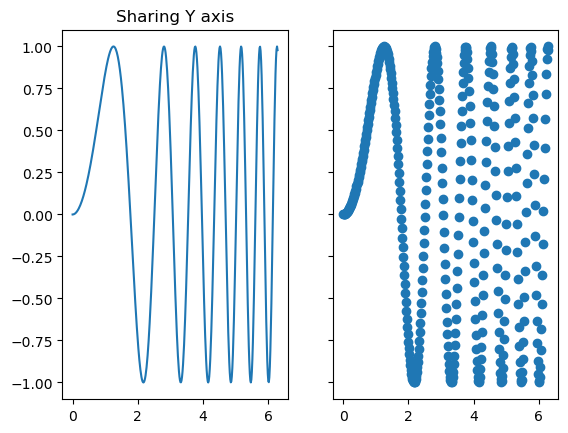

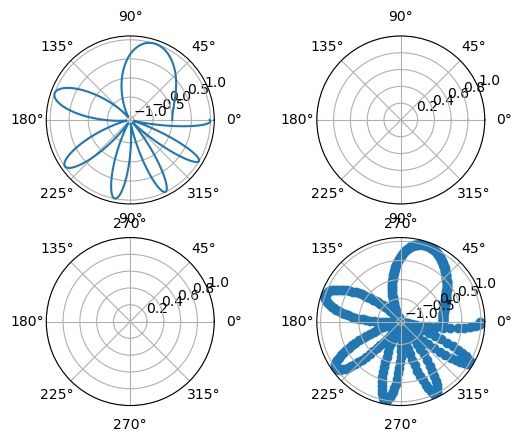

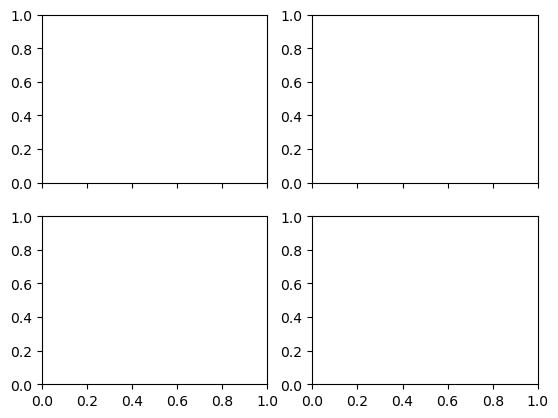

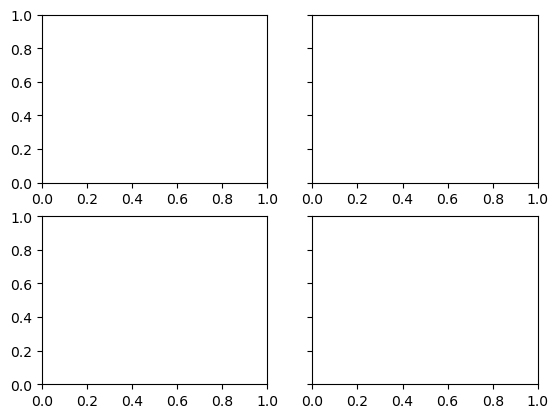

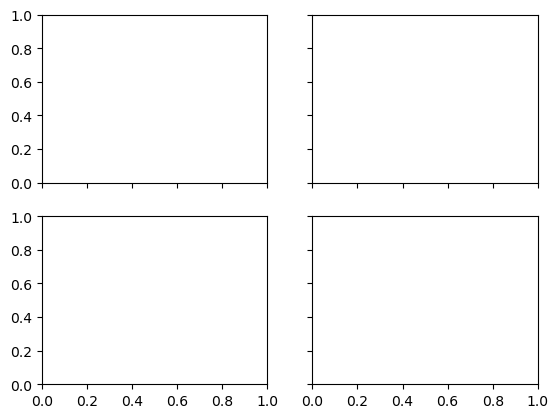

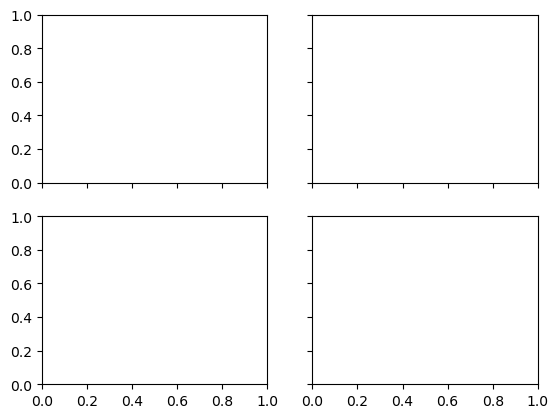

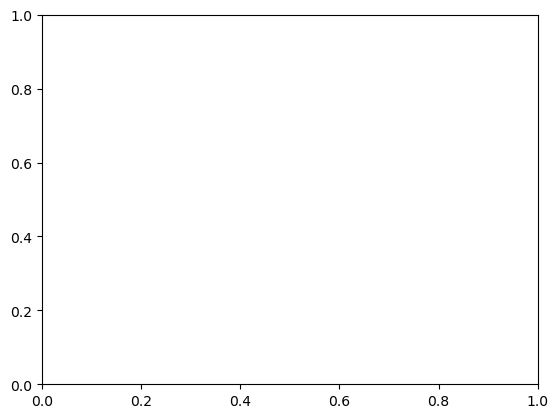

In [16]:
# First create some toy data:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

# Create just a figure and only one subplot
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')

# Create two subplots and unpack the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

# Create four polar axes and access them through the returned array
fig, axs = plt.subplots(2, 2, subplot_kw=dict(projection="polar"))
axs[0, 0].plot(x, y)
axs[1, 1].scatter(x, y)

# Share a X axis with each column of subplots
plt.subplots(2, 2, sharex='col')

# Share a Y axis with each row of subplots
plt.subplots(2, 2, sharey='row')

# Share both X and Y axes with all subplots
plt.subplots(2, 2, sharex='all', sharey='all')

# Note that this is the same as
plt.subplots(2, 2, sharex=True, sharey=True)

# Create figure number 10 with a single subplot
# and clears it if it already exists.
fig, ax = plt.subplots(num=10, clear=True)

In [45]:
sa[101].dt

0.002565019451832313